In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True);
from scipy import stats
from sklearn.model_selection import train_test_split

### Introduction
The aim of the project is to build and compare regression models based on decision trees. The Adult collection was used to create the models, which can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/. The collection contains approx. 30 thousand. observations, given as a unique observation with frequency weights.
The variables contain information about age, employment, education, marital status, occupation, role in the family, race, gender, country of origin, capital gains and losses, number of working hours per week, and the goal variable, i.e. the binary variable income, which informs whether a given person earns above or below 50,000 dollars a year. The frequency weights are illustrated by the variable fnlwgt.

Binary target variable: <strong>income</strong>  
Frequency variable: fnlwgt   
Continuous variables in the set: age, capital_gain, capital_loss, hours_per_week  
Nominal variables: workclass, education, marital_status, occupation, relationship, race, native_country
Binary variable: sex

The variable education has been dropped because it carries the same information as education_num.
Renamed education_num to education

Most of the variables contain information in the form of text; for the purposes of the analysis, the variables were given arbitrary numerical values.

The values of the variables can be seen in the tables below

### Targert variable
|income|
|---|
'<=50K' - 0  
'>50K' - 1  

### Dependent variables
workclass | education | marital_status | occupation | relationship | race |sex
---|---|---|---|---|---|---
'State-gov' - 0 |'Preschool' - 1 |'Never-married' - 0 | 'Adm-clerical' - 0  |'Not-in-family' - 0 |'White' - 0|'Male' - 0
'Self-emp-not-inc' - 1|'1st-4th' - 2| 'Married-civ-spouse' - 1 | 'Exec-managerial' - 1 |'Husband' - 1 |'Black' - 1|'Female' - 1
'Private' - 2 |'5th-6th' - 3   |'Divorced' - 2 |'Handlers-cleaners' - 2  |'Wife' - 2 |'Asian-Pac-Islander' - 2 | 
'Federal-gov' - 3 |'7th-8th' - 4 |'Married-spouse-absent' - 3 |'Prof-specialty' - 3 |'Own-child' - 3 |'Amer-Indian-Eskimo' - 3| 
'Local-gov' - 4 |'9th' - 5   | 'Separated' - 4 |'Other-service' - 4 |'Unmarried' - 4 |'Other' - 4| 
'Self-emp-inc' - 5 |'10th' - 6 |'Married-AF-spouse' - 5 |'Sales' - 5 |'Other-relative' - 5  
'Without-pay' - 6 |'11th' - 7  |'Widowed' - 6 |'Transport-moving' - 6  |
'Never-worked' - 7 |'12th' - 8 | |  'Farming-fishing' - 7  
 |'HS-grad' - 9 | | 'Machine-op-inspct' - 8  
 |'Some-college' - 10 | | 'Tech-support' - 9  
 |'Assoc-voc' - 11 | | 'Craft-repair' - 10  
 |'Assoc-acdm' - 12 | |  'Protective-serv' - 11  
 |'Bachelors' - 13 | | 'Armed-Forces' - 12  
 |'Masters' - 14 | | 'Priv-house-serv' - 13 
 |'Prof-school' - 15 | |   
 |'Doctorate' - 16  

|native country| | ||
|---|---|---|---|
'United-States' - 0 |'Philippines' - 11 |'El-Salvador' - 22 |'Trinadad&Tobago' - 33  
'Cuba' - 1  |'Poland' - 12|'France' - 23  |'Greece' - 34
'Jamaica'- 2  |'Columbia' - 13  |'Guatemala' - 24  |'Nicaragua' - 35
'India'- 3  |'Cambodia' - 14|'Italy' - 25|'Vietnam' - 36  
'Mexico'- 4 | 'Thailand' - 15 |'China' - 26|'Hong' - 37 
'Puerto-rico'- 5  |'Ecuador' - 16 |'South' - 27  |'Ireland' - 38 
'Honduras'- 6  |'Laos' - 17|'Japan' - 28|'Hungary' - 39  
'England'- 7  |'Taiwan' 18|'Yugoslavia' - 29|'Holand-Netherlands' - 40 
'Canada'- 8  |'Haiti' - 19  |'Peru' - 30|
'Germany'- 9  |'Portugal' - 20  | 'Outlying-US(Guam-USVI-etc)' - 31|
'Iran' - 10  |'Dominican-Republic' - 21  |'Scotland' - 32  |
 



  
  

 
 

 

In [12]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",sep=",",skipinitialspace=True, header=None)
del df[3]
df.isnull().sum()

0     0
1     0
2     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [13]:
for f in [1,5,6,7,8,9,13,14]:
    x = df[f].unique()
    for i in range(len(x)):
        df[f][df[f] == x[i]] = i
df.rename(columns={0:'age',
1:'workclass',
2:'fnlwgt',
4:'education',
5:'marital_status',
6:'occupation',
7:'relationship',
8:'race',
9:'sex',
10:'capital_gain',
11:'capital_loss',
12:'hours_per_week',
13:'native_country',
14:'income'}, inplace=True)

df.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,0,77516,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,13,1,3,2,1,1,0,0,40,1,0


Due to the huge number of observations (aprox. 6 billion), it has been decided to take a sample of 0.005% with observation frequency weights. The set was then transformed to contain unique observations (1 record = 1 person). It also helped in the correct division of the set into training and testing

In [14]:
ndf = df.reindex(df.index.repeat(df.fnlwgt/200000))
df = ndf.reset_index(drop=True)
del df['fnlwgt']

In [33]:
df = df.astype('int64')
df.dtypes

age               int64
workclass         int64
education         int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object

Text(0.5, 1.0, 'hours_per_week histogram')

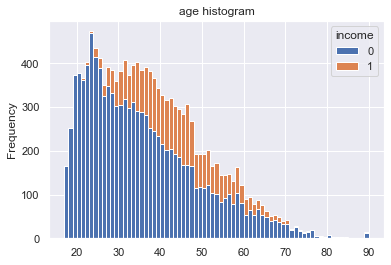

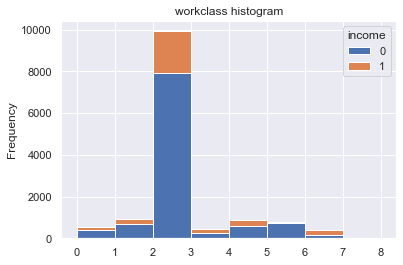

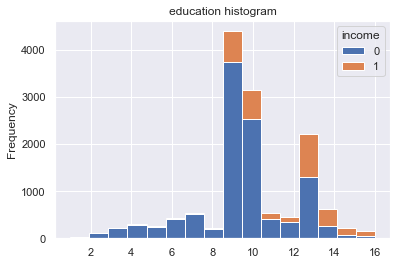

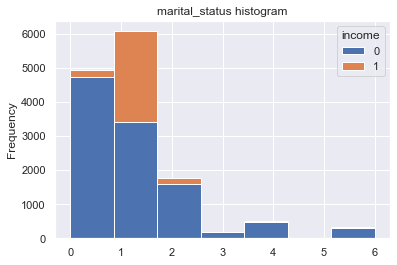

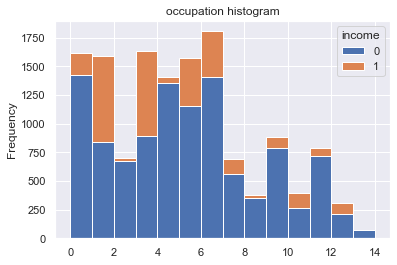

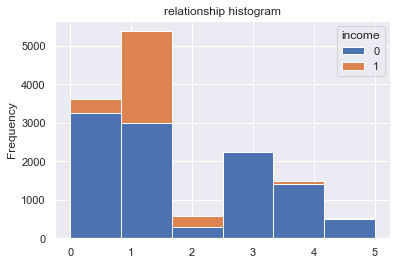

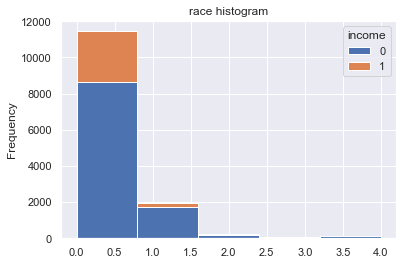

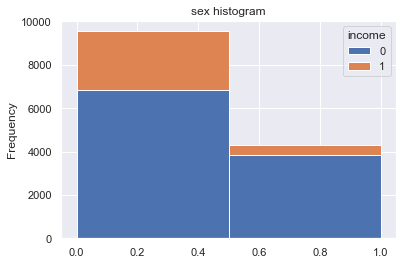

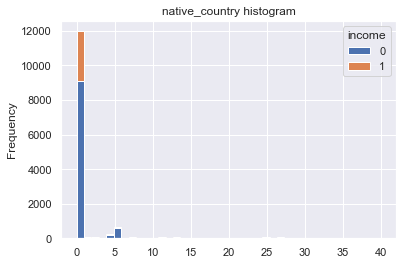

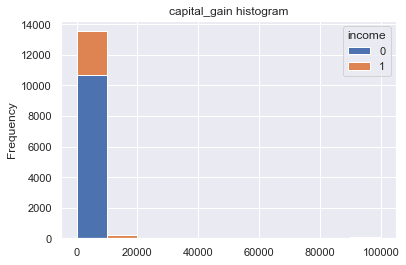

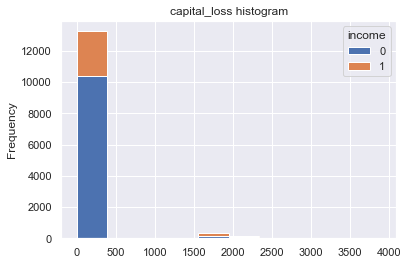

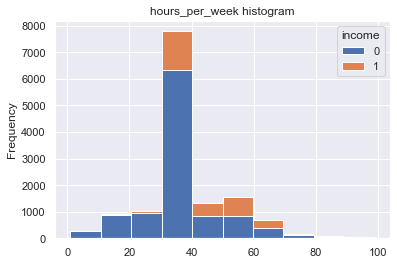

In [34]:
df.pivot(columns='income').age.plot(kind = 'hist', stacked=True, bins=max(df.age)-min(df.age))
plt.title("age histogram")
df.pivot(columns='income').workclass.plot(kind = 'hist', stacked=True, bins = 8)
plt.title("workclass histogram")
df.pivot(columns='income').education.plot(kind = 'hist', stacked=True, bins = 16)
plt.title("education histogram")
df.pivot(columns='income').marital_status.plot(kind = 'hist', stacked=True, bins = 7)
plt.title("marital_status histogram")
df.pivot(columns='income').occupation.plot(kind = 'hist', stacked=True, bins = 14)
plt.title("occupation histogram")
df.pivot(columns='income').relationship.plot(kind = 'hist', stacked=True, bins = 6)
plt.title("relationship histogram")
df.pivot(columns='income').race.plot(kind = 'hist', stacked=True, bins = 5)
plt.title("race histogram")
df.pivot(columns='income').sex.plot(kind = 'hist', stacked=True, bins = 2)
plt.title("sex histogram")
df.pivot(columns='income').native_country.plot(kind = 'hist', stacked=True, bins = 41)
plt.title("native_country histogram")
df.pivot(columns='income').capital_gain.plot(kind = 'hist', stacked=True)
plt.title("capital_gain histogram")
df.pivot(columns='income').capital_loss.plot(kind = 'hist', stacked=True)
plt.title("capital_loss histogram")
df.pivot(columns='income').hours_per_week.plot(kind = 'hist', stacked=True)
plt.title("hours_per_week histogram")

### Data mining
You can see from the charts above that most people earning over 50,000 dollars a year are people in the 30-50 age group
The vast majority of respondents worked privately
The vast majority of the respondents graduated from high school or entered college, it is worth noting that for education above a bachelor's / engineering degree, the share of people earning over 50,000 dollars a year.
Almost half of the respondents live in civil law relationships and this group has the highest percentage of high earners
The respondents are fairly evenly distributed in professional groups, the highest percentages of people with good earnings are recorded for the Manager and Specialist professions.
Most of the respondents are white, and this group has the highest proportion of high earners
Most of the respondents are men
Almost all respondents come from the USA
Most of the respondents did not make any capital gains or losses.
Most of the respondents work 40 hours a week

In [35]:
from sklearn.neighbors import KernelDensity
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree

Dataset was divided into training and testing in the ratio of 85/15%

In [36]:
#podział zbiorów
X = df.drop('income', axis = 1)
y = df['income']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.15, random_state = 42)

In [38]:
CART = tree.DecisionTreeRegressor(random_state=42,ccp_alpha=0.0)
CART_model=CART.fit(X_train,y_train)

Single tree parameters tuning

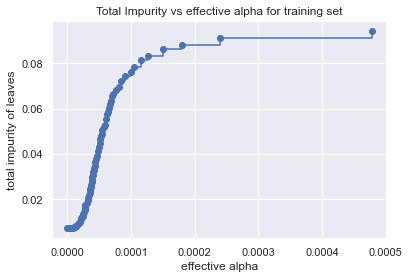

In [39]:
path = CART.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas[::10], path.impurities[::10]
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

In [40]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 15 with ccp_alpha: 0.0018358540086903727


In [41]:
def RMSE(model,X,y):
    return np.sqrt(((model.predict(X)-y)**2).mean())

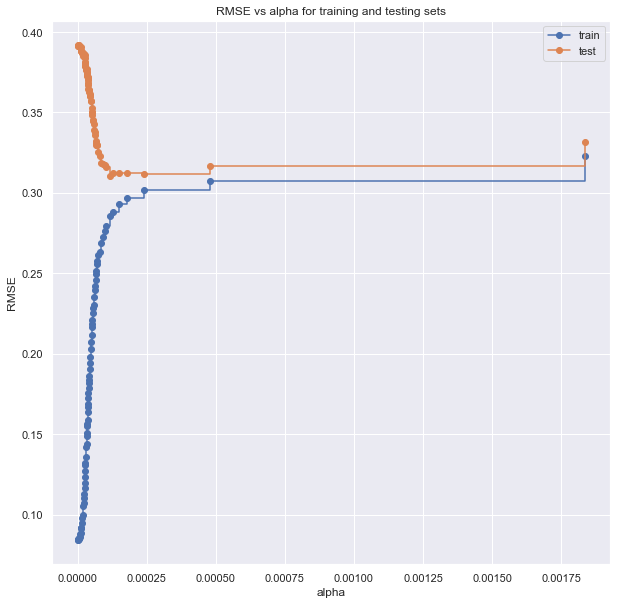

In [42]:
test_scores = [RMSE(clf,X_test,y_test) for clf in clfs]
train_scores = [RMSE(clf,X_train,y_train) for clf in clfs]

fig, ax = plt.subplots(figsize=[10,10])
ax.set_xlabel("alpha")
ax.set_ylabel("RMSE")
ax.set_title("RMSE vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [43]:
Best_CART = clfs[np.argmin(test_scores)]
Best_CART.ccp_alpha

0.00011589282617076566

In [44]:
min(test_scores)

0.31072324307627164

For a single tree, the best model is for ccp_alpha equal to <strong> 1.159e-4 </strong>, the RSME for it is <strong> 0.311 </strong>

In [45]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

Random Forest parameters tuning

In [46]:
#Checking number of tress influence on RMSE
rfr = RandomForestRegressor
N = [10,50,100,200,300,400,500]
RMSE_RF= [RMSE(rfr(n,n_jobs=-1).fit(X_train,y_train),X_test,y_test) for n in N]

300

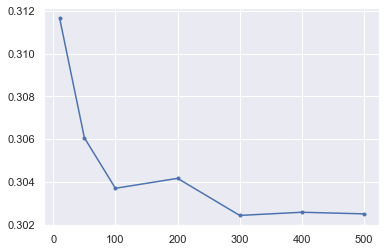

In [47]:
plt.plot(N,RMSE_RF,'.-');
N[np.argmin(RMSE_RF)]

In [48]:
### Checking number of features influence on RMSE
features = np.linspace(1,X_train.shape[1],12).astype(int)
RMSE_RF_features= [RMSE(rfr(300,max_features=n,n_jobs=-1).fit(X_train,y_train),X_test,y_test) for n in features]

2

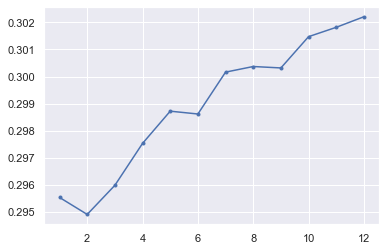

In [49]:
plt.plot(features,RMSE_RF_features,'.-');
features[np.argmin(RMSE_RF_features)]

In [50]:
Best_RF = RandomForestRegressor(300,max_features=3,n_jobs=-1).fit(X_train,y_train)

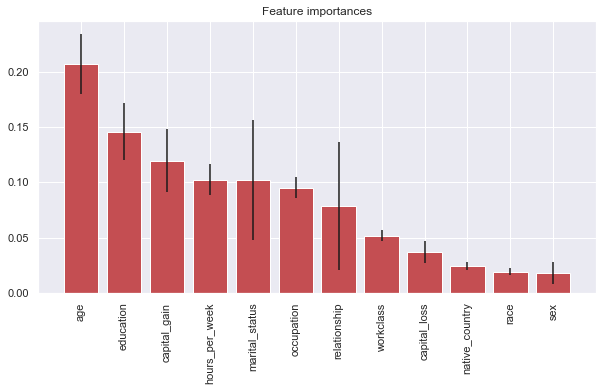

In [51]:
# Plot the feature importances of the forest
importances = Best_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in Best_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

num_feat = 12
plt.figure(figsize=[10,5])
plt.title("Feature importances")
plt.bar(range(num_feat)[:num_feat], importances[indices][:num_feat],
       color="r", yerr=std[indices][:num_feat], align="center")
plt.xticks(range(num_feat)[:num_feat], X_train.columns[indices],rotation='vertical')
plt.xlim([-1, num_feat])
plt.show()

The best Random Forest model was obtained for <strong> 300 </strong> trees and <strong> 3 </strong> variables, the most important variables in the model are age and education

Gradient Boosting parameters tuning

500

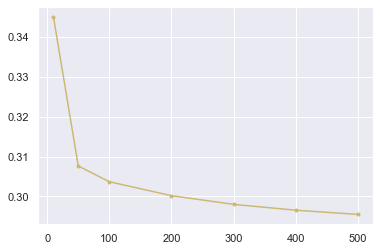

In [52]:
gbr = GradientBoostingRegressor
N = [10,50,100,200,300,400,500]
RMSE_GBT = [RMSE(gbr(n_estimators=n).fit(X_train,y_train),X_test,y_test) for n in N]

plt.plot(N,RMSE_GBT,'.-',color='y');
N[np.argmin(RMSE_GBT)]

From the number of trees equal to <strong> 200 </strong> there is no significant decrease in error, so it was decided to take this amount

In [53]:
Best_GBT = GradientBoostingRegressor(n_estimators=500).fit(X_train,y_train)

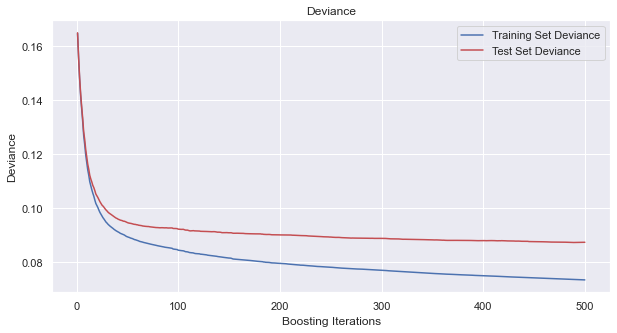

In [54]:
test_score = np.zeros((500,), dtype=np.float64)

for i, y_pred in enumerate(Best_GBT.staged_predict(X_test)):
    test_score[i] = Best_GBT.loss_(y_test, y_pred)

plt.figure(figsize=(10,5))
plt.title('Deviance')
plt.plot(np.arange(500) + 1, Best_GBT.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(500) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance');

The deviation on the test set is not much higher than on the training set

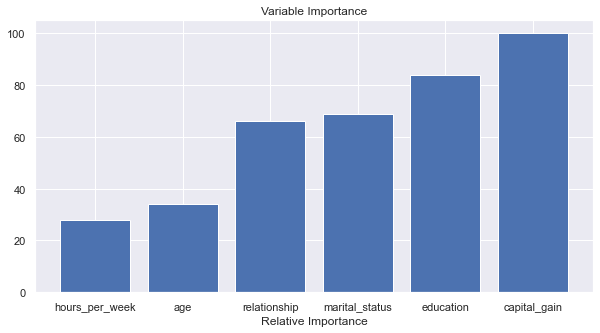

In [56]:
feature_importance = Best_GBT.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 6
plt.figure(figsize=[10,5])
plt.bar(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center')
plt.xticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The most important variables in the model are capital_gain, marital_status and education

In [57]:
models = [Best_CART, Best_RF, Best_GBT]
errors = [RMSE(m, X_test, y_test) for m in models]

[0.31072324307627164, 0.2960830629447945, 0.29551116617151696]

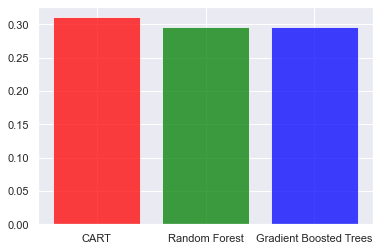

In [58]:
plt.bar(['CART','Random Forest','Gradient Boosted Trees'], errors, color=['red', 'green', 'blue'], alpha=0.75);
errors

In the chart above, you can see that all the models did the same, the Random Forest scored the best, but not much of a difference. Due to the amount of computation needed to model, a single tree would be a good choice, as using Random Forest or Gradient Boosting we do not have much improvement in the fit of the model. The difficulty was the number of variables, the number of unique observations was nearly 6 billion, so in order to model the regression in a reasonable time, it was decided to use a very small sample in relation to the population. It is worth noting that a quick comparative analysis on a small sample of variables can be used to build a more accurate model for a larger number of variables